# Homework 3

### Due: Thursday Oct 5, at 11:59pm via Blackboard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## Problem 1: Peformance of Large vs. Small Companies

Companies vary greatly in size. This variation can hide how well a company is performing. Rather than looking at the raw profit numbers, analysts consider financial ratios that adjust for the size of the company. A popular ratio is the return on assets, defined as:

**Return on Assets $= Net Income/Total Assets$**

Net income is another name for profits, and the total assets of a company is the value of everything it owns that is used to produce profits. The return on assets indicates how much profit the company generates relative to the amount that it invested to make that profit. A company with losses rather than profits has a negative return on assets. 

**Data:** The data set `Company.csv` gives the company name, total assets (in Millions \$), net income (in Millions \$), and the number of employees reported by 167 retailers in the United States. 

In the following questions, you will be performing an **exploratory data analysis (EDA)** for the given companies data. 

In [2]:
df_company = pd.read_csv('Company.csv')
df_company.shape

(167, 4)

In [3]:
df_company.head()

,Company Name,Total Assets (M$),Net Income (M$),# Employees
0,1-800-FLOWERS.COM,256,-4,2200
1,99 CENTS ONLY STORES,824,74,12000
2,A.C. MOORE ARTS & CRAFTS INC,237,-30,4710
3,ABERCROMBIE & FITCH -CL A,2948,150,85000
4,ADVANCE AUTO PARTS INC,3354,346,51017


### 1.1. (2 points) Compute and report (in a short paragraph of text) the following summary statistics for the `Net Income (M\$)` data (round your values to the nearest integer):

    - Mean
    - Median
    - Standard Deviation
    - Range
    - IQR 

#### **Summary:**
Based on the descriptive statistics of the data, in average, company obtains net income of $334 million. However, by seeing the minimum number, we can conclude that there are companies which get negative net income (net loss). In addition, by seeing the P75 and maximum number, it can be observed that there might be several companies which have exteremely outlier number of net income on the data distribution.

In [4]:
print('Mean:',  df_company['Net Income (M$)'].mean().astype('int64'))
print('Median:', df_company['Net Income (M$)'].quantile(0.5).astype('int64'))
print('Standard Deviation:',  round(df_company['Net Income (M$)'].std()))
print('Range:', int(df_company['Net Income (M$)'].max() - df_company['Net Income (M$)'].min()))
print('IQR:',  int(df_company['Net Income (M$)'].quantile(0.75) - df_company['Net Income (M$)'].quantile(0.25)))

Mean: 334
Median: 34
Standard Deviation: 1385
Range: 17899
IQR: 188


### 1.2. (2 points) Report the % of companies that inccured losses. For this question, you are expected to add a new categorical variable to the dataset (call it `Profit`) with two levels: `PROFIT` if the net income is above zero (net income >= 0) and `LOSS` if the net income is below zero (net income < 0). 



In [5]:
df_company['Profit'] = ["Profit" if x >= 0 else "Loss" for x in df_company['Net Income (M$)']]
df_company.head()

,Company Name,Total Assets (M$),Net Income (M$),# Employees,Profit
0,1-800-FLOWERS.COM,256,-4,2200,Loss
1,99 CENTS ONLY STORES,824,74,12000,Profit
2,A.C. MOORE ARTS & CRAFTS INC,237,-30,4710,Loss
3,ABERCROMBIE & FITCH -CL A,2948,150,85000,Profit
4,ADVANCE AUTO PARTS INC,3354,346,51017,Profit


In [6]:
df_company['Profit'].value_counts(normalize=True)

Profit
Profit    0.766467
Loss      0.233533
Name: proportion, dtype: float64

### 1.3. (2 points) What is the shape of the distribution of the variable `Net Income (M$)`? For this question, you are expected to create **both** a histogram and a boxplot, and comment about the shape of the distribution and if there are any companies with an outlier net income.

#### **Summary**:
Seeing the histogram and boxplot chart below, the shape of distribution for Net Income data in Company dataset is right-skewed distribution

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Net Income (M$)', ylabel='Count'>

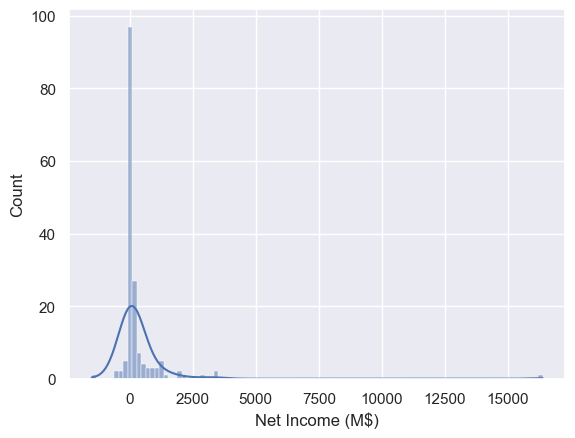

In [8]:
sns.set_theme()
sns.histplot(df_company['Net Income (M$)'], bins=100, kde = True)

<Axes: >

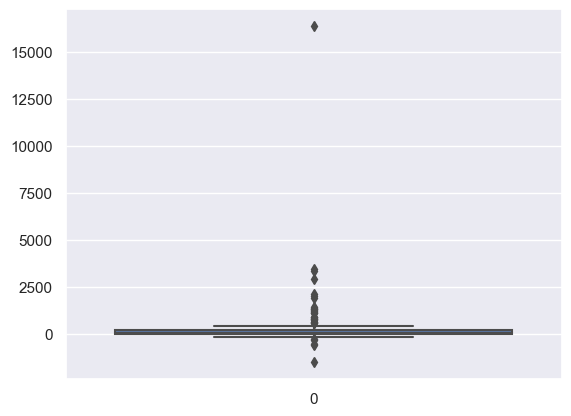

In [9]:
sns.boxplot(df_company['Net Income (M$)'])

### 1.4. (2 points) A company that has more than 5000 employees is considered a large one, otherwise it is cosidered small. Create a new categroical variable (call it `Company Size`) with two levels: `LARGE` if the number of employees is greater than 5000 (employees > 5000), and `SMALL` otherwise (employees <=5000). What is the % of large and small companies in the dataset?

In [10]:
df_company['Company Size'] = ["Large" if x > 5000 else "Small" for x in df_company['# Employees']]
df_company.head()

,Company Name,Total Assets (M$),Net Income (M$),# Employees,Profit,Company Size
0,1-800-FLOWERS.COM,256,-4,2200,Loss,Small
1,99 CENTS ONLY STORES,824,74,12000,Profit,Large
2,A.C. MOORE ARTS & CRAFTS INC,237,-30,4710,Loss,Small
3,ABERCROMBIE & FITCH -CL A,2948,150,85000,Profit,Large
4,ADVANCE AUTO PARTS INC,3354,346,51017,Profit,Large


In [11]:
df_company['Company Size'].value_counts(normalize=True)

Company Size
Large    0.688623
Small    0.311377
Name: proportion, dtype: float64

### 1.5. (2 points) Create a side-by-side boxplot to compare the distribtution of `Net Income (M$)` for both Large and Small companies. What does this graph tell you about the net income for both types of companies?

#### **Summary:**
First highlighted point is that there is an extreme outlier data in large company one which make the chart difficult to be compared. So, I try to remove that outlier and having new observation. In the new observation, it seems that large-sized companies obtain more net income than the small-sized ones by seeing the stats location on the boxplot such as median, Q1, and Q3 data.

<Axes: xlabel='Company Size', ylabel='Net Income (M$)'>

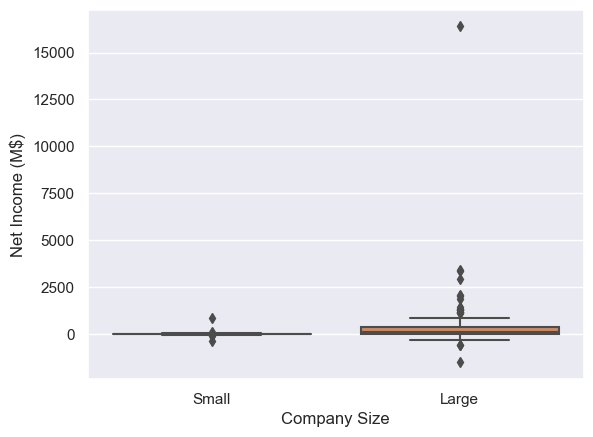

In [12]:
sns.boxplot(data=df_company, y="Net Income (M$)", x='Company Size')

### 1.6. (3 points) A better way to assess the performance of companies is to look at their `Return on Assets` instead of looking only at net income. The return on assets indicates how much profit the company generates relative to the amount that it invested to make profits. 

- Create a new numerical variable (call it `Return on Assets`) based on the formula: **Return on Assets = Net Income/Total Assets**. 

- What is the shape of the distribution of the variable `Return on Assets`? For this question, you are expected to create **both** a histogram and a boxplot, and comment about the shape of the distribution and if there are any companies with an outlier return on assets value.

- Create a side-by-side boxplot to compare the distribtution of `Return on Assets` for both Large and Small companies. What does this graph tell you about the return on assets for both types of companies?

In [13]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company Name       167 non-null    object
 1   Total Assets (M$)  167 non-null    int64 
 2   Net Income (M$)    167 non-null    int64 
 3   # Employees        167 non-null    int64 
 4   Profit             167 non-null    object
 5   Company Size       167 non-null    object
dtypes: int64(3), object(3)
memory usage: 8.0+ KB


In [14]:
df_company['Return on Assets'] = df_company['Net Income (M$)']/df_company['Total Assets (M$)']
df_company.head()

,Company Name,Total Assets (M$),Net Income (M$),# Employees,Profit,Company Size,Return on Assets
0,1-800-FLOWERS.COM,256,-4,2200,Loss,Small,-0.015625
1,99 CENTS ONLY STORES,824,74,12000,Profit,Large,0.089806
2,A.C. MOORE ARTS & CRAFTS INC,237,-30,4710,Loss,Small,-0.126582
3,ABERCROMBIE & FITCH -CL A,2948,150,85000,Profit,Large,0.050882
4,ADVANCE AUTO PARTS INC,3354,346,51017,Profit,Large,0.103160


<Axes: xlabel='Return on Assets', ylabel='Count'>

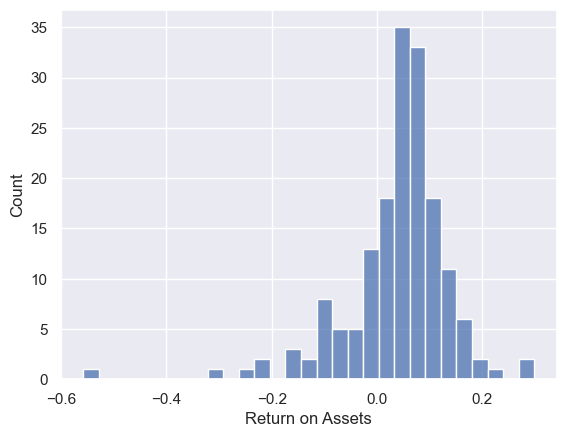

In [15]:
sns.histplot(df_company['Return on Assets'])

<Axes: ylabel='Return on Assets'>

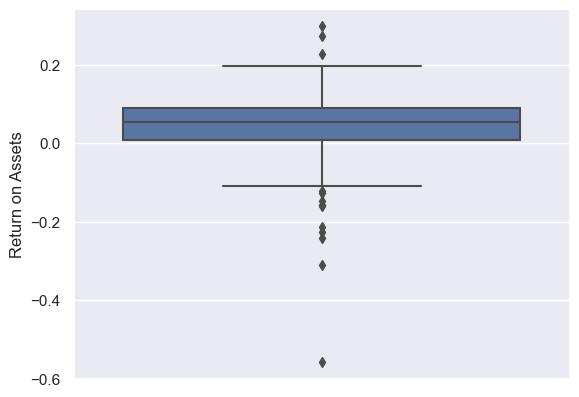

In [16]:
sns.boxplot(df_company, y = 'Return on Assets')

<Axes: xlabel='Company Size', ylabel='Return on Assets'>

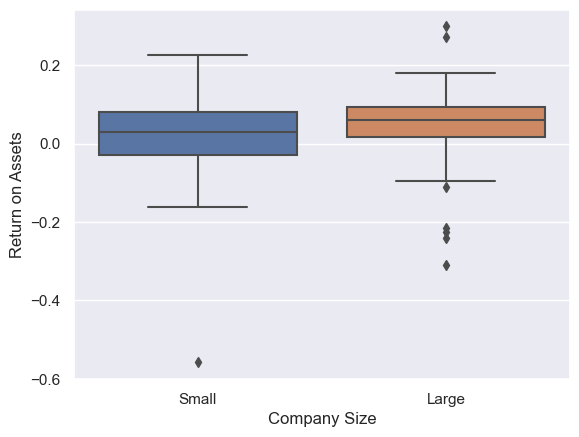

In [17]:
sns.boxplot(df_company, x = 'Company Size', y = 'Return on Assets')

### 1.7. (1 point) Which company has the least return on assets?

SCHOOL SPECIALTY INC is the company which has the least return on assets

In [18]:
df_company.sort_values(by = 'Return on Assets').head(1)

,Company Name,Total Assets (M$),Net Income (M$),# Employees,Profit,Company Size,Return on Assets
123,SCHOOL SPECIALTY INC,638,-356,1919,Loss,Small,-0.557994


## Problem 2: Data Analytics Jobs in the USA

Soon you will start getting ready to explore the job market for data analyst/data scientist positions (internship and full time). In this case study, we will assess the job market in the USA, and in particular, we are interested to learn which business sectors and companies are looking to hire data analysts in different US states. This should get you started with your internship search for Summer 2022.

The data set (`DataAnalyst.csv`) is available for download from blackboard. It is scrapped and cleaned from GlassDoor using this [web scrapper](https://github.com/picklesueat/data_jobs_data/blob/master/glass_scraper.py). We will learn how to scrap data from the web in the second half of the semester.

The dataset has a sample of 2,253 job listings. The following table describes some of the variables necessary to answer the questions in this quiz:

|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`Job Title`| listing's job title
|`Job Description`| listing's job description
|`Rating`| the company's rating on Glassdoor
|`Company Name` | the listing company's name
|`City` | city location of the company 
|`State`| state location of the company
|`Size` | number of employees in the company 
|`Founded`| the year the company was founded
|`Type of ownership`| is the company private, public, non-profit, etc.?
|`Industry`| primary business activity 
|`Sector`| economic sector classification for the company
|`Revenue`| company's income generated from business operations
|`Competitors`| the company's list of competitors
|`Min_Salary`| the minimum salary listing for the position
|`Max_Salary`| the maximum salary listing for the position

**In this homework, we assume that the sample of 2,253 job listings is a representative of the population of job listings in the USA.**

### 2.1 (1 point) What are the top 4 sectors with the highest count of job listings?

In [19]:
df_data_analyst = pd.read_csv('DataAnalyst.csv')
df_data_analyst.head()

,Job Title,Job Description,Rating,Company Name,City,State,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,New York,NY,201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,37,66
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,New York,NY,10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,New York,NY,1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,37,66
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,New York,NY,201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,37,66
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,New York,NY,501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,37,66


In [20]:
df_data_analyst['Sector'].value_counts().head(4)

Sector
Information Technology    570
Business Services         524
Finance                   169
Health Care               151
Name: count, dtype: int64

### 2.2. (1 point) Suppose that you want to focus your job search in the following sectors (Information Technology, Business Services, Finance,  Health Care). Create a subset of the given dataset that include only these 4 sectors with their data (include all variables).

*Name the subset dataframe `mydata`.*

In [21]:
mydata = df_data_analyst[(df_data_analyst['Sector'] == 'Information Technology') | (df_data_analyst['Sector'] ==  'Business Services') | (df_data_analyst['Sector'] == 'Finance') | (df_data_analyst['Sector'] == 'Health Care')]
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1414 entries, 1 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1414 non-null   object 
 1   Job Description    1414 non-null   object 
 2   Rating             1386 non-null   float64
 3   Company Name       1414 non-null   object 
 4   City               1414 non-null   object 
 5   State              1414 non-null   object 
 6   Size               1414 non-null   object 
 7   Founded            1200 non-null   float64
 8   Type of ownership  1414 non-null   object 
 9   Industry           1414 non-null   object 
 10  Sector             1414 non-null   object 
 11  Revenue            1414 non-null   object 
 12  Competitors        380 non-null    object 
 13  Min_Salary         1414 non-null   int64  
 14  Max_Salary         1414 non-null   int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 176.8+ KB


In [22]:
mydata['Sector'].unique()

array(['Health Care', 'Information Technology', 'Finance',
       'Business Services'], dtype=object)

### 2.3 (2 points) You are given the range of salary for each job listing (minimum and maximum salary). Add a new variable to `mydata` to estimate the salary of the for each of the listing in the dataset. The estimate salary is the average of the given minimum and maximum salary.

*Name the the new column `Est_Salary`.*

What is the **average**, and **standard deviation** for the estimated salary among the 4 sectors listed in `mydata` dataframe?

In [23]:
mydata.loc[:, 'Est_Salary'] = (mydata.loc[:, 'Min_Salary']+mydata.loc[:, 'Max_Salary'])/2

/var/folders/76/7ftvty753sx628h00l7k3dy80000gn/T/ipykernel_59255/332837099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata.loc[:, 'Est_Salary'] = (mydata.loc[:, 'Min_Salary']+mydata.loc[:, 'Max_Salary'])/2


In [24]:
mydata[['Sector', 'Est_Salary']].groupby('Sector').describe().loc[:,(slice(None),['mean','std'])]

Est_Salary           
                             mean        std
Sector                                      
Business Services       72.135496  22.411196
Finance                 67.644970  22.545747
Health Care             72.807947  26.554150
Information Technology  74.247368  25.520887

In [25]:
mydata[['Sector', 'Est_Salary']].groupby('Sector').describe()

Est_Salary                                           \
                            count       mean        std   min    25%   50%   
Sector                                                                       
Business Services           524.0  72.135496  22.411196   0.0  59.50  68.5   
Finance                     169.0  67.644970  22.545747  33.5  53.00  63.5   
Health Care                 151.0  72.807947  26.554150  33.5  53.75  68.0   
Information Technology      570.0  74.247368  25.520887  33.5  59.00  70.0   

                                     
                         75%    max  
Sector                               
Business Services       80.5  150.0  
Finance                 76.0  138.5  
Health Care             87.0  150.0  
Information Technology  85.0  150.0

In [26]:
mydata.head(3)

,Job Title,Job Description,Rating,Company Name,City,State,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary,Est_Salary
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,New York,NY,10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,37,66,51.5
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,New York,NY,1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,37,66,51.5
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,New York,NY,201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,37,66,51.5


### 2.4 (2 points) Create a side-by-side boxplot to show the distribution of salaries among the four hiring sectors (listed in `mydata`). What does the boxplot tell you about the salaries in these industries for data analysts?

<Axes: xlabel='Sector', ylabel='Est_Salary'>

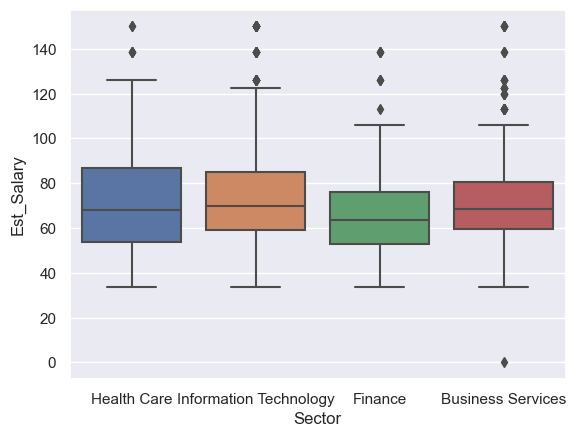

In [27]:
sns.boxplot(data = mydata, x = 'Sector', y = 'Est_Salary')

Seeing the data distribution across these 4 industries especially on the median, it can concluded that the salaries for data analyst in the industries are quite comparable and competitive one another.

### 2.5 (2 points) List the company names (distinct) in the **Information Technology** sector has job postings with estimated salaries above 100K dollars?

In [28]:
mydata[(mydata['Sector'] == 'Information Technology') & (mydata['Est_Salary'] > 100)]['Company Name'].unique()

array(['Criteo', 'Tekfortune Inc.', 'Staffigo Technical Services, LLC',
       '8K Miles Software Services, Inc.', 'VTS',
       'RMS Computer Corporation', 'Reliable Software Resources',
       'Oracle', 'Avani Technology Solutions', 'Primesoft',
       'Systemart LLC', 'TechProjects', 'Information Technology Partners',
       'TikTok', 'Synchronous Solutions, Inc', 'HR Pundits',
       'Softpath System LLC', 'Motorola Solutions', 'Capgemini', 'NVIDIA',
       'Risk Management Solutions (RMS)', 'LeanData', 'Alteryx',
       'L&T Infotech', 'IntraEdge', 'Joomag, Inc.', 'Moveworks', 'Ursus',
       'Nuro', 'TalentBurst, Inc.', 'BayOne Solutions', 'Logic Planet',
       'Netflix', 'Diverse Lynx', 'Adwait Algorithm', 'Netflix, Inc.',
       'Apple', 'Collabera', 'Crystal Equation', 'Frontend Arts',
       'Poshmark', 'Zolon Tech Solutions Inc.', 'Lodestone', 'SAP',
       'Calsoft Labs', 'Coinbase', 'Trifacta', 'Wilbur Labs',
       'User Testing', 'Priceonomics', 'BOLD', 'Flatiron Health

### 2.6 (3 points) Use the dataset with the 4 sectors (`mydata`) to create a dot plot (lollipop plot) that shows the top 15 states with the highest average salaries.

*Name the dataframe `top15states`*

*The resulting dataframe should have two columns (`State`, `Avg Salary`), where `Avg Salary` is the mean salary in the corresponding `State`*

*Use two different colors of your choice to distingusih between the states with avegrage salary larger than \$75K and thos with average salary less than \$75K.* 

In [29]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1414 entries, 1 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1414 non-null   object 
 1   Job Description    1414 non-null   object 
 2   Rating             1386 non-null   float64
 3   Company Name       1414 non-null   object 
 4   City               1414 non-null   object 
 5   State              1414 non-null   object 
 6   Size               1414 non-null   object 
 7   Founded            1200 non-null   float64
 8   Type of ownership  1414 non-null   object 
 9   Industry           1414 non-null   object 
 10  Sector             1414 non-null   object 
 11  Revenue            1414 non-null   object 
 12  Competitors        380 non-null    object 
 13  Min_Salary         1414 non-null   int64  
 14  Max_Salary         1414 non-null   int64  
 15  Est_Salary         1414 non-null   float64
dtypes: float64(3), int64(2), obje

In [30]:
top15states = mydata[['State', 'Est_Salary']].groupby('State').mean().sort_values(by = 'Est_Salary', ascending = False).head(15)
top15states

,Est_Salary
State,
CA,90.986595
IL,78.027778
NJ,73.925000
CO,73.100000
NY,71.856195
AZ,70.771186
SC,70.250000
NC,67.849206
VA,65.074074


In [31]:
mycolors = ["orange" if x >= 75 else "skyblue" for x in top15states['Est_Salary']]
mycolors

['orange',
 'orange',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue']

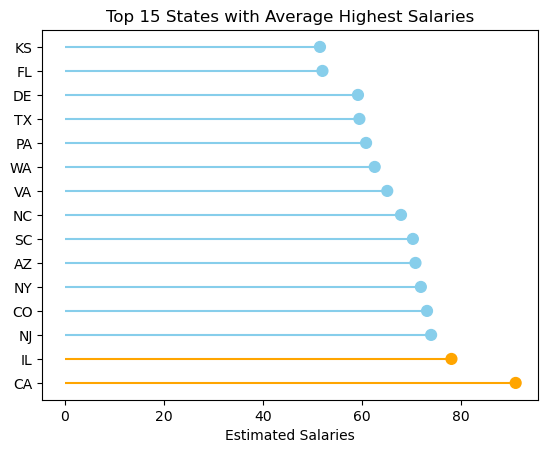

In [33]:
mycolors = ["orange" if x >= 75 else "skyblue" for x in top15states['Est_Salary']]

plt.style.use('default')

plt.hlines(y = top15states.index, xmin = 0, xmax = top15states, color=mycolors)
plt.scatter(top15states, top15states.index, s = 60, color = mycolors)
plt.title('Top 15 States with Average Highest Salaries')
plt.xlabel('Estimated Salaries')

plt.show()